# PART 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# file_path = 'resource/iris.data'

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv("../HW4/resource/iris.data", header=None, names=column_names)

species_index = df_iris['species'].unique()
df_new = pd.DataFrame(index=species_index)
df_new


""
Iris-setosa
Iris-versicolor
Iris-virginica


# PART 1

In [2]:
df_grouped = df_iris.groupby("species")
mean_df = df_grouped.mean()
var_df = df_grouped.var()
std_df = df_grouped.std()
max_df = df_grouped.max()
min_df = df_grouped.min()
rng_df = max_df - min_df

mean_df.columns = [col + '_mean' for col in mean_df.columns]
var_df.columns = [col + '_var' for col in var_df.columns]
std_df.columns = [col + '_std' for col in std_df.columns]
max_df.columns = [col + '_min' for col in max_df.columns]
min_df.columns = [col + '_max' for col in min_df.columns]
rng_df.columns = [col + '_range' for col in rng_df.columns]

df_new = mean_df.join(var_df).join(std_df).join(max_df).join(min_df).join(rng_df)
# df_new = df_new.transpose()
display(df_new.T)


species,Iris-setosa,Iris-versicolor,Iris-virginica
sepal_length_mean,5.006000,5.936000,6.588000
sepal_width_mean,3.418000,2.770000,2.974000
petal_length_mean,1.464000,4.260000,5.552000
petal_width_mean,0.244000,1.326000,2.026000
sepal_length_var,0.124249,0.266433,0.404343
sepal_width_var,0.145180,0.098469,0.104004
petal_length_var,0.030106,0.220816,0.304588
petal_width_var,0.011494,0.039106,0.075433
sepal_length_std,0.352490,0.516171,0.635880
sepal_width_std,0.381024,0.313798,0.322497


# PART 2

In [3]:
corr_by_species = df_iris.groupby('species').apply(lambda x: x.iloc[:, :-1].corr(), include_groups = False)
# corr_by_species = df_iris.groupby('species').apply(lambda x: x.select_dtypes(include=['number']).corr(),
#                                                    include_groups=False)
corr_by_species

sepal_length  sepal_width  petal_length
species                                                              
Iris-setosa     sepal_length      1.000000     0.746780      0.263874
                sepal_width       0.746780     1.000000      0.176695
                petal_length      0.263874     0.176695      1.000000
Iris-versicolor sepal_length      1.000000     0.525911      0.754049
                sepal_width       0.525911     1.000000      0.560522
                petal_length      0.754049     0.560522      1.000000
Iris-virginica  sepal_length      1.000000     0.457228      0.864225
                sepal_width       0.457228     1.000000      0.401045
                petal_length      0.864225     0.401045      1.000000

# PART 3

<Figure size 1000x1000 with 0 Axes>

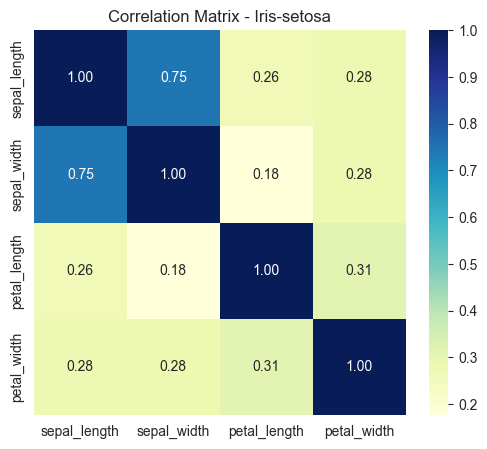

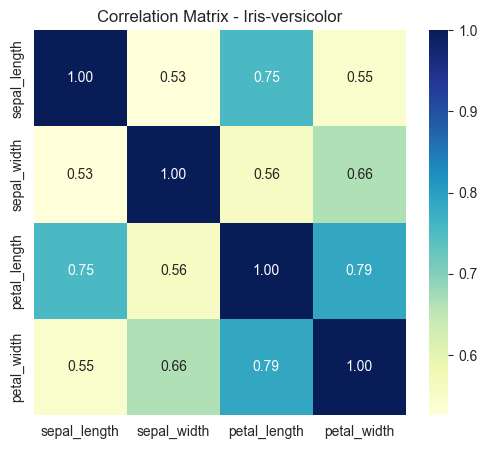

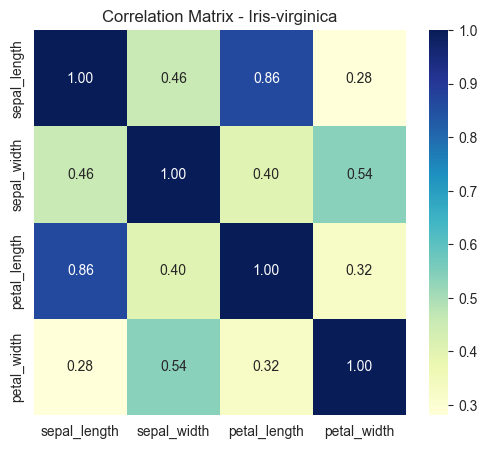

In [4]:
plt.figure(figsize=(10,10))
species_corr = {}
for species in df_iris['species'].unique():
    species_data = df_iris[df_iris['species'] == species].select_dtypes(include=['number'])
    species_corr[species] = species_data.corr()

for species, corr_matrix in species_corr.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f'Correlation Matrix - {species}')
    plt.show()

# PART 4 - 5

In [9]:
for species, corr_matrix in species_corr.items():
    # print(corr_matrix)
    corr_v = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
    # print(corr_v)
    abs_corr = corr_v.abs().unstack().sort_values(ascending=False).dropna()
    strongest_pair = abs_corr.index[0]
    strongest_value = corr_matrix.loc[strongest_pair[0], strongest_pair[1]]
    print(f"Strongest Pair in {species}: {strongest_pair} (corr={strongest_value:.2f})")
print("اینجا ما همبستگی منفی نداریم یعنی فقط با افزایش مقدار اولی با مقدار دوم هم افزایش میابد.")


Strongest Pair in Iris-setosa: ('sepal_length', 'sepal_width') (corr=0.75)
Strongest Pair in Iris-versicolor: ('petal_length', 'petal_width') (corr=0.79)
Strongest Pair in Iris-virginica: ('sepal_length', 'petal_length') (corr=0.86)
اینجا ما همبستگی منفی نداریم یعنی فقط با افزایش مقدار اولی با مقدار دوم هم افزایش میابد.


In [6]:
# arr_3d = np.array([[1, 2],
#                    [3, 4],
#                    [5, 6], [7, 8]])
# print(arr_3d.shape)        # (2, 2, 2)
# print(arr_3d.shape[0])     # 2 (تعداد بلوک‌ها)
# print(arr_3d.shape[1])     # 2 (تعداد سطرها در هر بلوک)
# # print(arr_3d.shape[2])
#
# arr_4d = np.random.rand(2, 3, 4, 5)
# print(arr_4d)
# print(arr_4d.shape)  # (2, 3, 4, 5)
# for i in range(4):
#     print(arr_4d.shape[i])

In [7]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # اسامی ستون‌ها را به صورت کامل بنویسید:
# feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
#
# # بارگذاری داده با اسامی ستون درست:
# df = pd.read_csv('../HW4/resource/iris.data', header=None, names=feature_cols)
#
# classes = df['class'].unique()
#
# for c in classes:
#     print(f"=== Class: {c} ===")
#     sub = df[df['class'] == c][feature_cols[:-1]]  # فقط ویژگی‌ها، بدون کلاس
#     print("Mean:\n", sub.mean())
#     print("Std:\n", sub.std())
#     print("Range:\n", sub.max() - sub.min())
#     corr = sub.corr()
#     print("Correlation Matrix:\n", corr)
#     plt.figure(figsize=(5,4))
#     sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#     plt.title(f"Heatmap of Correlation for class {c}")
#     plt.show()
#     # پیدا کردن جفت بیشترین همبستگی (به جز قطر اصلی)
#     corr_v = corr.where(~np.eye(corr.shape[0],dtype=bool))
#     maxcorr = corr_v.abs().unstack().sort_values(ascending=False).dropna().index[0]
#     print(f"Strongest Pair: {maxcorr}")
